# Podstawy Przetwarzania Dużych Zbiorów Danych
## Poziom 3
Grupa IBD4 Poniedziałki 8:30

Łukasz Moskwa 247739

Artur Szewczykowski 252546


# 0.0 Importy

In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec

sns.set_theme(style='whitegrid')

df_data = pd.read_csv("../datasets/final_data.csv")
df_data['date'] = pd.to_datetime(df_data['date'])
df_data = df_data.sort_values('date')
df_europe = df_data[df_data['Continent'] == 'Europe'].copy()
df_europe

,Country_name,3_letter_code,population_urban,gdp_per_capita_usd,GDP_2022,date,Total_confirmed_cases,Total_new_deceased,Total_new_vaccinations,New_persons_fully_vaccinated,...,Murders_Rate_2012,Murders_Rate_2013,Murders_Rate_2014,Murders_Rate_2015,Murders_Rate_2016,Murders_Rate_2017,Murders_Rate_2018,Murders_Rate_2019,Murders_Rate_2020,Murders_Rate_2021
13038,Latvia,LVA,1304943.0,17818.0,3.420999e+10,2020-12-07,712,5,1.0,NaN,...,3.408588,2.461252,3.182435,3.363531,3.496369,4.143514,4.339671,3.391501,3.689936,3.041754
26746,Norway,NOR,4418218.0,75419.0,4.018484e+11,2020-12-08,392,2,5.0,NaN,...,0.537950,0.905393,0.564430,0.462396,0.515603,0.530565,0.470604,0.523533,0.576225,0.536737
26747,Norway,NOR,4418218.0,75419.0,4.018484e+11,2020-12-09,453,0,1.0,NaN,...,0.537950,0.905393,0.564430,0.462396,0.515603,0.530565,0.470604,0.523533,0.576225,0.536737
13039,Latvia,LVA,1304943.0,17818.0,3.420999e+10,2020-12-09,680,15,1.0,NaN,...,3.408588,2.461252,3.182435,3.363531,3.496369,4.143514,4.339671,3.391501,3.689936,3.041754
26748,Norway,NOR,4418218.0,75419.0,4.018484e+11,2020-12-10,435,21,1.0,NaN,...,0.537950,0.905393,0.564430,0.462396,0.515603,0.530565,0.470604,0.523533,0.576225,0.536737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,Italy,ITA,42651966.0,34456.0,2.079749e+12,2022-09-13,23161,93,306.0,216.0,...,0.880543,0.832330,0.787430,0.778644,0.672005,0.626625,0.599558,0.530740,0.478987,0.511476
23889,Austria,AUT,5194416.0,51448.0,4.557663e+11,2022-09-13,6177,1,98.0,0.0,...,0.960896,0.719379,0.491454,0.509117,0.618097,0.795681,0.972794,0.867123,0.729699,0.728530
16027,Czech Republic,CZE,7887156.0,23010.0,2.450519e+11,2022-09-13,3020,5,84.0,82.0,...,0.998947,0.855957,0.770168,0.836200,0.617425,0.626703,NaN,0.920577,0.731178,0.447161
9329,Italy,ITA,42651966.0,34456.0,2.079749e+12,2022-09-14,18854,69,239.0,222.0,...,0.880543,0.832330,0.787430,0.778644,0.672005,0.626625,0.599558,0.530740,0.478987,0.511476


# Część 1: Analiza danych

In [6]:
columns: dict = {
    'Nowe_zachorowania': 'Total_confirmed_cases',
    'Nowe_zgony': 'Total_new_deceased',
    'Nowe_szczepienia': 'Total_new_vaccinations',
    'Nowe_pełne_szczepienia': 'New_persons_fully_vaccinated',
    'Nowe_testy': 'Total_tested'
}

df_europe_ex1 = df_europe[['date', 'Country_name'] + list(columns.values())].copy()

for key, value in columns.items():
    df_europe_ex1[f'{key}_srednia_7dni'] = df_europe_ex1[value].rolling(window=7).mean()
    df_europe_ex1[f'{key}_odchylenie_7dni'] = df_europe_ex1[value].rolling(window=7).std()

display(df_europe_ex1)

,date,Country_name,Total_confirmed_cases,Total_new_deceased,Total_new_vaccinations,New_persons_fully_vaccinated,Total_tested,Nowe_zachorowania_srednia_7dni,Nowe_zachorowania_odchylenie_7dni,Nowe_zgony_srednia_7dni,Nowe_zgony_odchylenie_7dni,Nowe_szczepienia_srednia_7dni,Nowe_szczepienia_odchylenie_7dni,Nowe_pełne_szczepienia_srednia_7dni,Nowe_pełne_szczepienia_odchylenie_7dni,Nowe_testy_srednia_7dni,Nowe_testy_odchylenie_7dni
13038,2020-12-07,Latvia,712,5,1.0,NaN,9764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26746,2020-12-08,Norway,392,2,5.0,NaN,18928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26747,2020-12-09,Norway,453,0,1.0,NaN,19328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13039,2020-12-09,Latvia,680,15,1.0,NaN,9642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26748,2020-12-10,Norway,435,21,1.0,NaN,17819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,2022-09-13,Italy,23161,93,306.0,216.0,184211,5696.714286,8038.430500,18.714286,34.310903,122.000000,131.718133,71.142857,76.812388,37188.142857,66320.624960
23889,2022-09-13,Austria,6177,1,98.0,0.0,105278,6111.571429,7967.117083,17.571429,34.817894,123.142857,131.428597,60.714286,81.340261,51290.142857,69157.883936
16027,2022-09-13,Czech Republic,3020,5,84.0,82.0,6575,6510.571429,7688.356497,18.285714,34.446646,129.428571,127.791311,65.857143,81.392933,51997.571429,68588.134540
9329,2022-09-14,Italy,18854,69,239.0,222.0,171457,8930.000000,8611.600974,28.142857,38.028185,158.285714,126.238814,91.857143,98.935044,75460.285714,78142.866515


In [7]:
def plot_rolling_stats_subplots(df, metric_name, window=7, figsize=(14, 12)):
    """
    Generuje podwójny wykres w subplotach z separacją:
    - górny: tylko średnia krocząca
    - dolny: średnia + odchylenie + wypełniony obszar

    Parametry:
    ----------
    df : DataFrame
        Zbiór danych
    metric_name : str
        Nazwa metryki (np. 'Nowe_zachorowania')
    window : int
        Okno dla średniej kroczącej
    figsize : tuple
        Rozmiar wykresu
    """
    # Utworzenie figury z GridSpec
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 0.05, 1])  # 3 wiersze: wykres, linia, wykres

    # Górny wykres - średnia krocząca
    ax1 = fig.add_subplot(gs[0])
    sns.lineplot(data=df, x='date', y=f'{metric_name}_srednia_{window}dni',
                label=f'Średnia {window}-dniowa', color='darkblue', linewidth=2, ax=ax1, errorbar=None)
    ax1.set(title=f'{metric_name.replace("_", " ")} - średnia {window}-dniowa',
           ylabel='Liczba',
           xlabel='')
    ax1.legend()
    ax1.grid(True)

    # Czarna linia oddzielająca
    ax_line = fig.add_subplot(gs[1])
    ax_line.axis('off')
    ax_line.axhline(y=0.5, color='black', linewidth=2)

    # Dolny wykres - analiza zmienności
    ax2 = fig.add_subplot(gs[2])
    sns.lineplot(data=df, x='date', y=f'{metric_name}_srednia_{window}dni',
                label=f'Średnia {window}-dniowa', color='darkblue', linewidth=2, ax=ax2, errorbar=None)
    sns.lineplot(data=df, x='date', y=f'{metric_name}_odchylenie_{window}dni',
                label=f'Odchylenie {window}-dniowe', color='red', linewidth=1.5, alpha=0.5, ax=ax2, errorbar=None)
    ax2.fill_between(df['date'],
                    df[f'{metric_name}_srednia_{window}dni'] - df[f'{metric_name}_odchylenie_{window}dni'],
                    df[f'{metric_name}_srednia_{window}dni'] + df[f'{metric_name}_odchylenie_{window}dni'],
                    color='skyblue', alpha=0.3, label=f'Zakres ±1σ ({window} dni)')
    ax2.set(title=f'{metric_name.replace("_", " ")} - analiza zmienności',
           xlabel='Data',
           ylabel='Liczba')
    ax2.legend()
    ax2.grid(True)

    # Wspólne formatowanie
    for ax in [ax1, ax2]:
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'.replace(',', ' ')))
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

## 1.1 Liczby nowych zachorowań

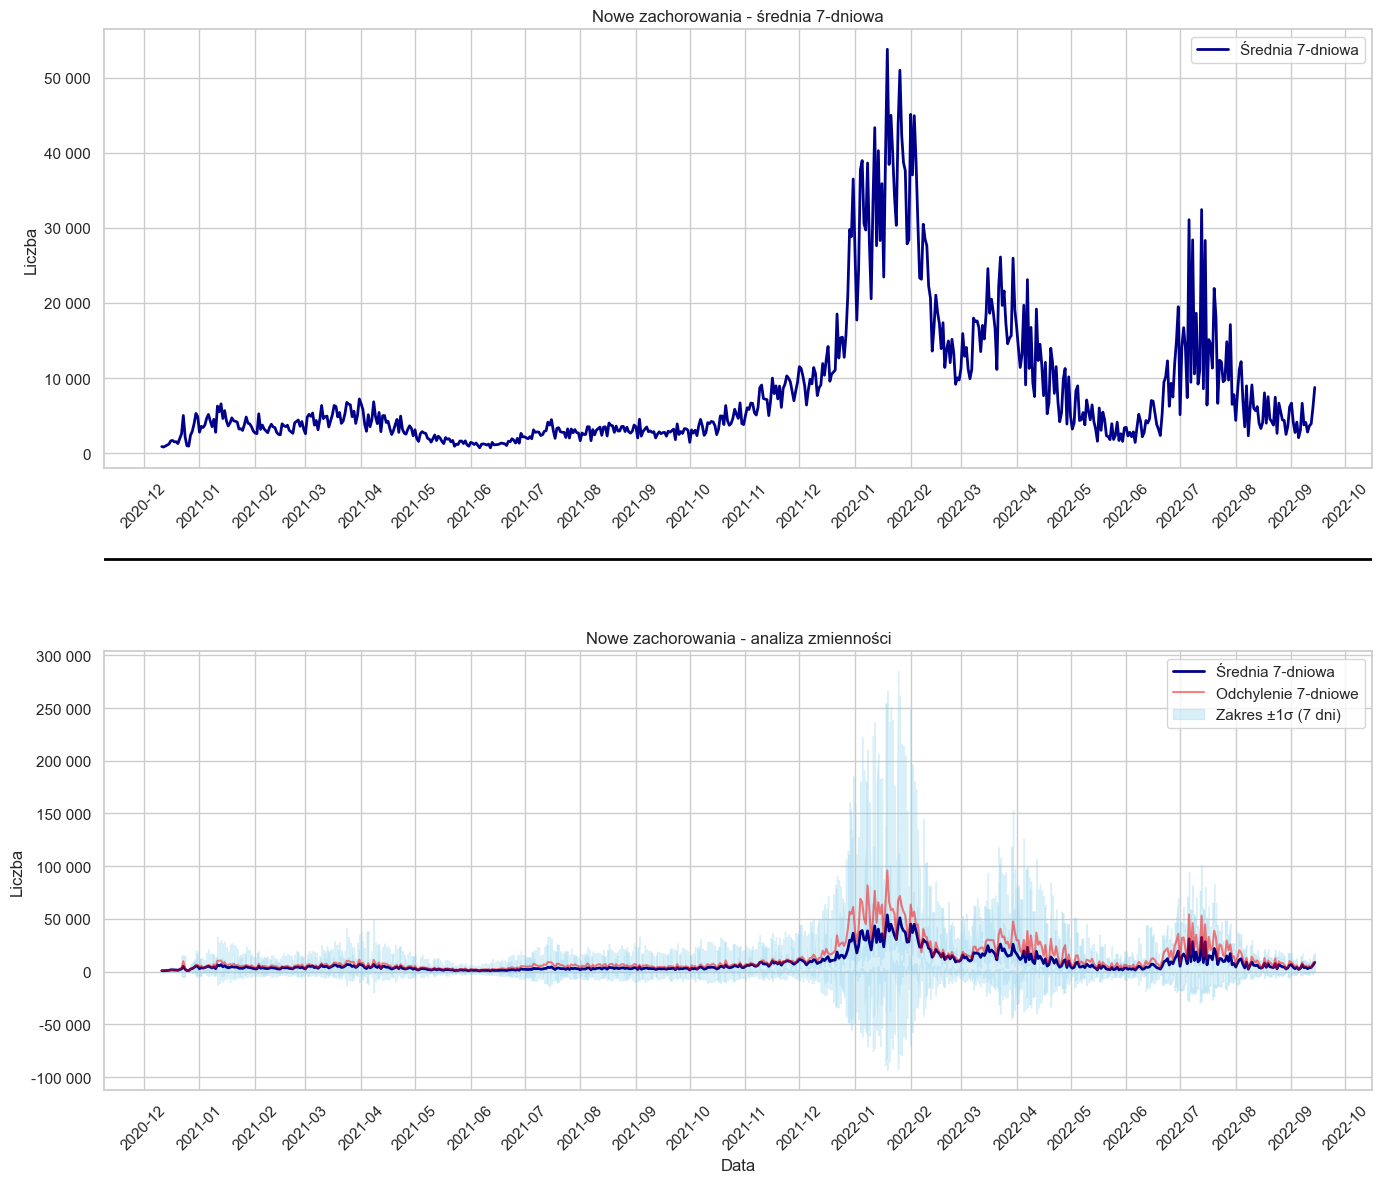

In [8]:
plot_rolling_stats_subplots(df_europe_ex1, 'Nowe_zachorowania')

Wnioski:
1. Widzimy bardzo dużo nowych zachorowań po 2 latach od pojawieenia się wirusa. 
2. Obserwujemy, że w okresach około świątecznych oraz wakacyjnych wzrasta liczba zachorowań.
3. Zauważamy również fakt, w czasie liczniejszych wysypów zachorowań bardzo mocno rośnie wartość odchylenia standardowego.

# 1.2 Liczba nowych śmierci

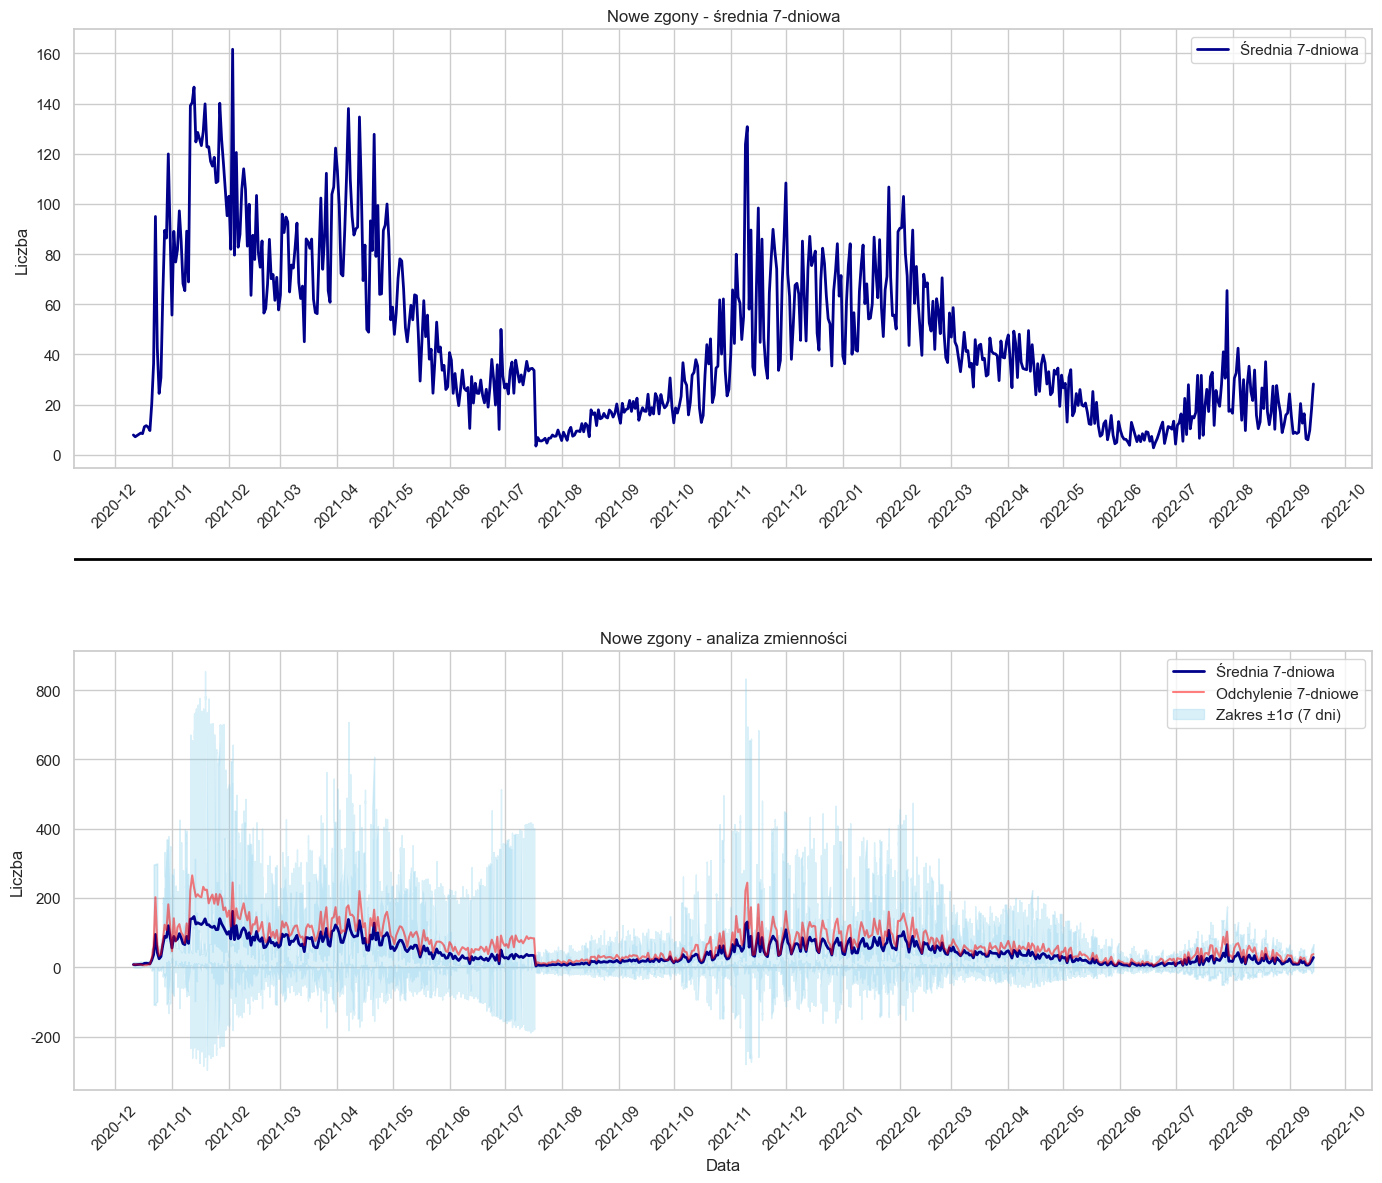

In [9]:
plot_rolling_stats_subplots(df_europe_ex1, 'Nowe_zgony')

Wnioski:
1. Na początku 2021 roku wprowadzano lockdown w większości państw europejskich oraz zaczęto szczepienia. Co przyczyniło się do prawie zerowych zgonów w Europie.
2. Po zmniejszeniu ograniczeń ponownie widać rosnącą liczbę zgonów.
3. Po 2021 roku liczba zgonów zaczeła poważnie maleć co może pokazywać, że ludzie nabierali odporności zbiorowej.

# 1.3 Liczba nowych szczepień

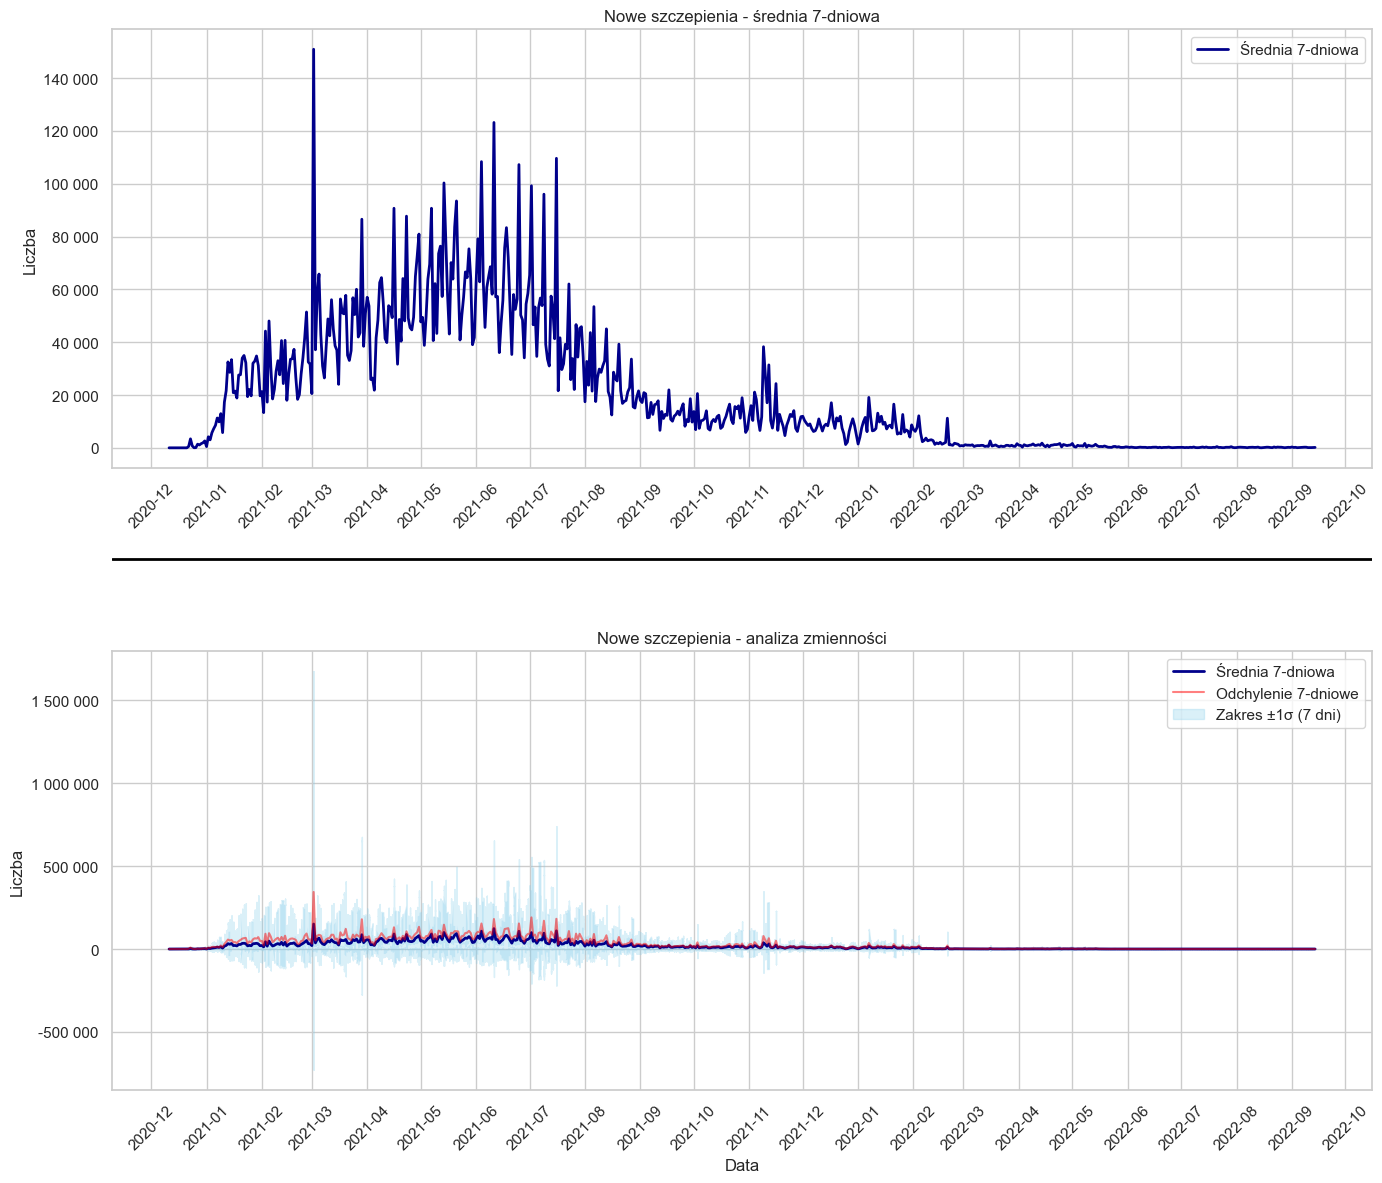

In [10]:
plot_rolling_stats_subplots(df_europe_ex1, 'Nowe_szczepienia')

Wnioski:
1. Duża liczba szczepień zaraz po ich wprowadzeniu. Nastepnie stopniowo mniejsze zainteresowanie szczepieniami.

# 1.4 Liczba w pełni zaszczepionych

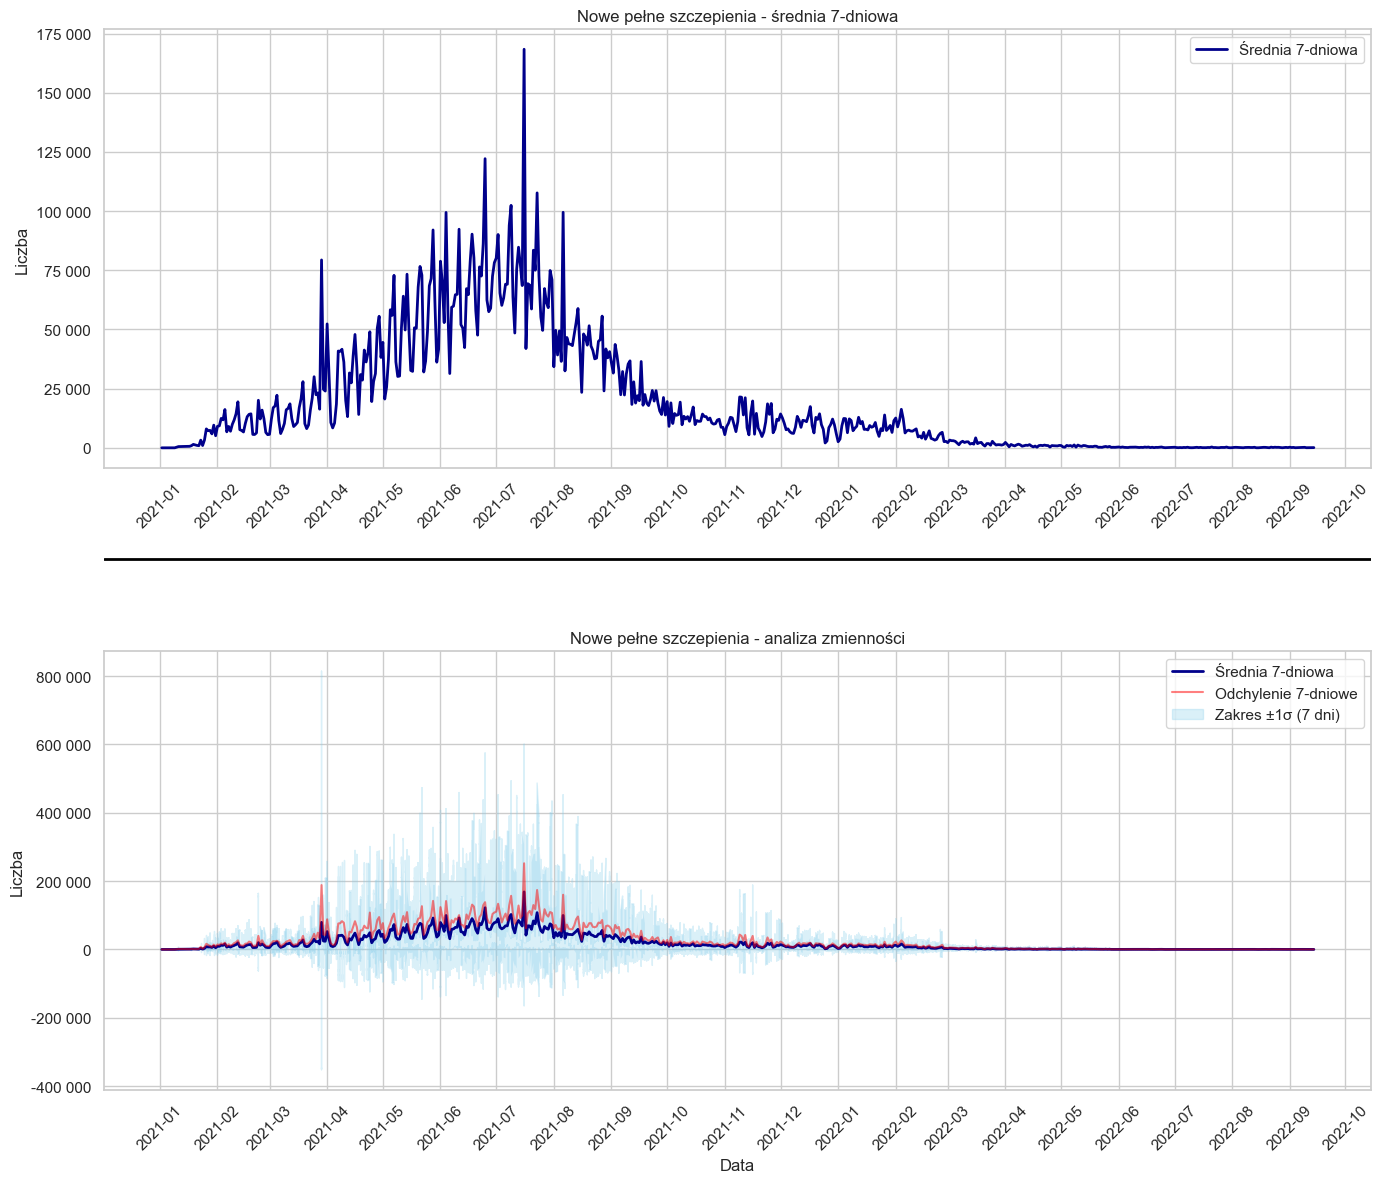

In [11]:
plot_rolling_stats_subplots(df_europe_ex1, 'Nowe_pełne_szczepienia')

Wnioski:
1. Duża liczba szczepień zaraz po ich wprowadzeniu. Nastepnie stopniowo mniejsze zainteresowanie szczepieniami.
2. Bardzo ładnie widać przesunięcie trendu w czasie względem zwykłych szczepień.

# 1.5 Liczba testów

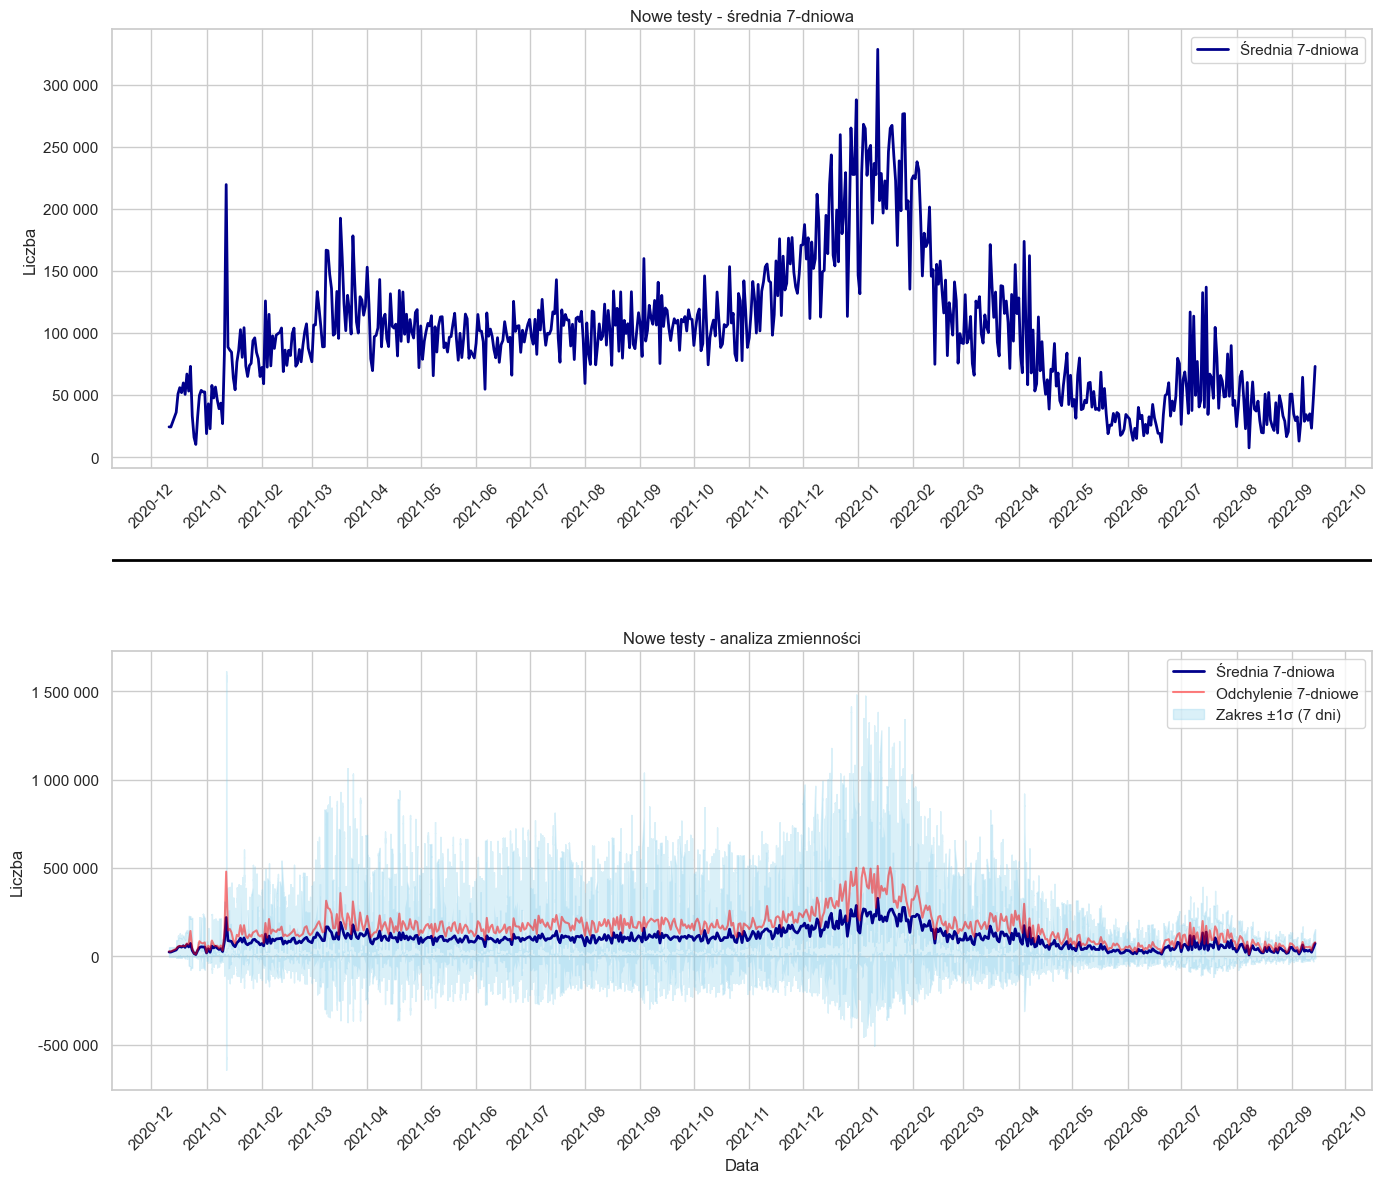

In [12]:
plot_rolling_stats_subplots(df_europe_ex1, 'Nowe_testy')

Wnioski:
1. Wyglądaja jak nałożenie na siebie wykresów zachorowań i śmierci.
2. Testy przez prawie cały okres trwania COVID19 utrzymywały się na podobnym poziomie.
3. Zauważamy, że w okresie świąt Bożego Narodzenia 2021 oraz zimy 2021-2022 wykonywano więcej testów niż zwykle

# Część 2 - Szeregi czasowe

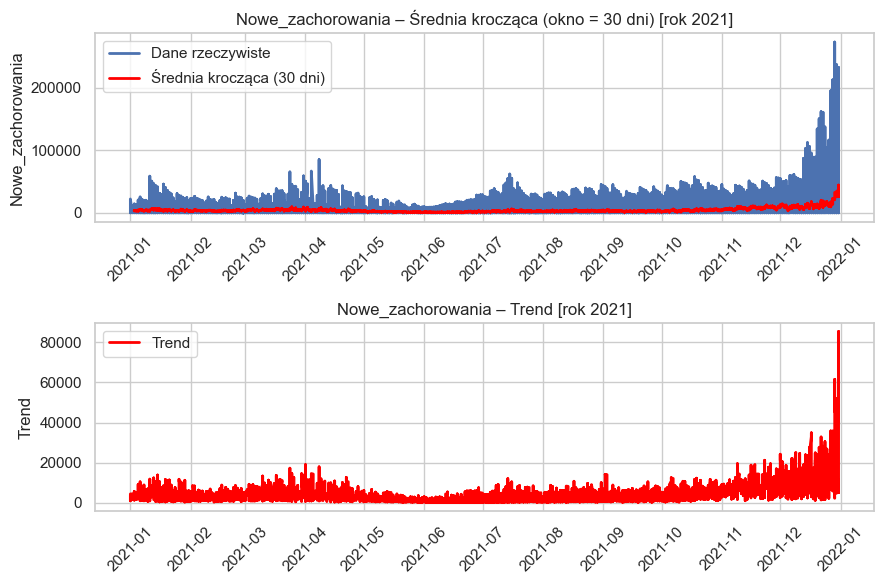

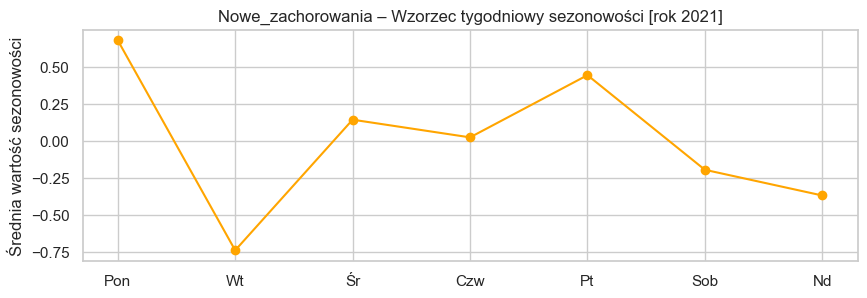

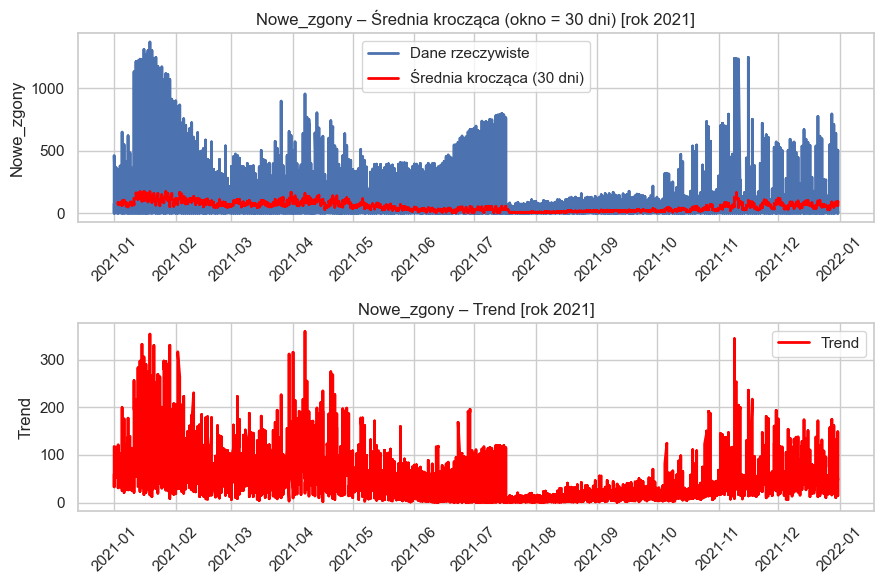

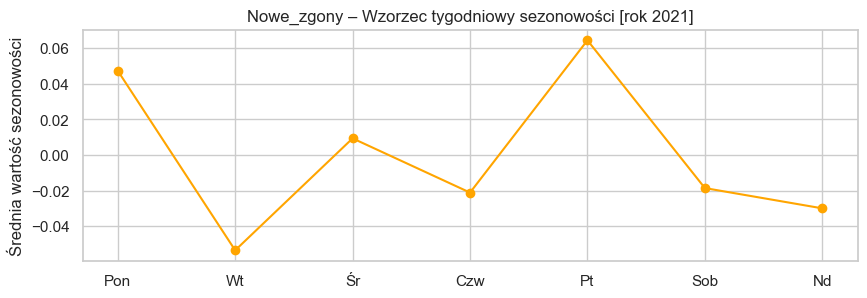

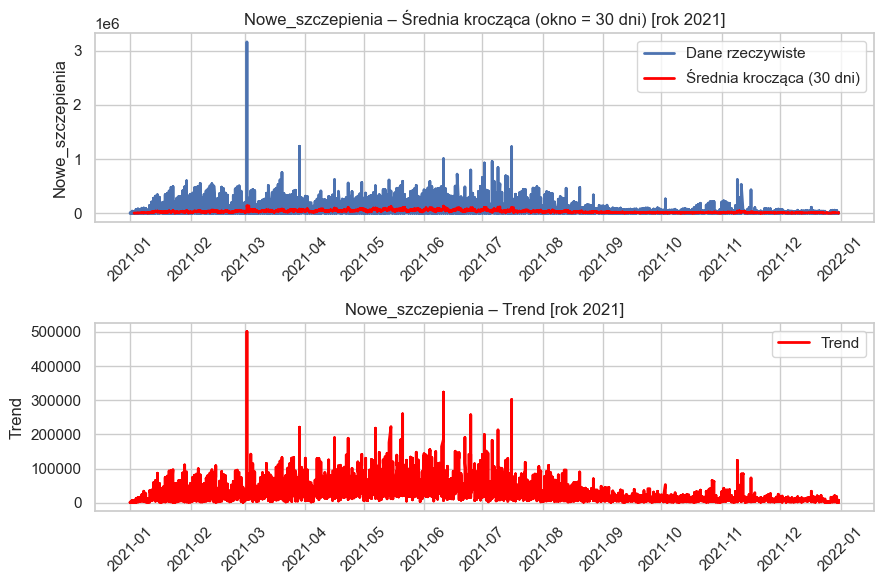

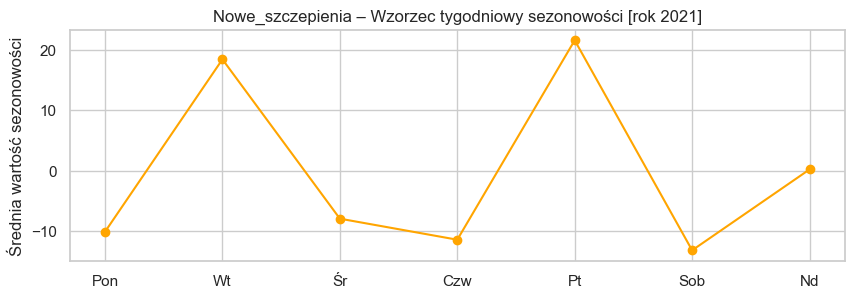

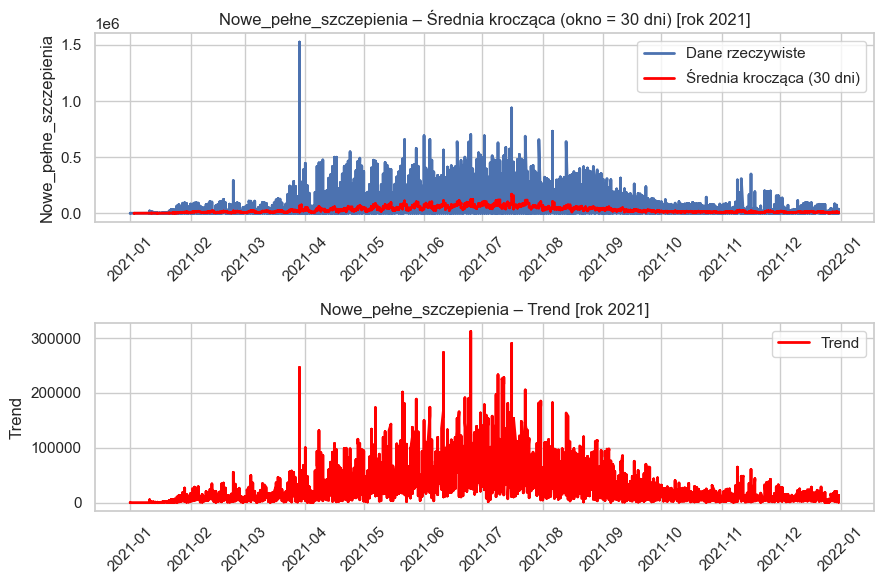

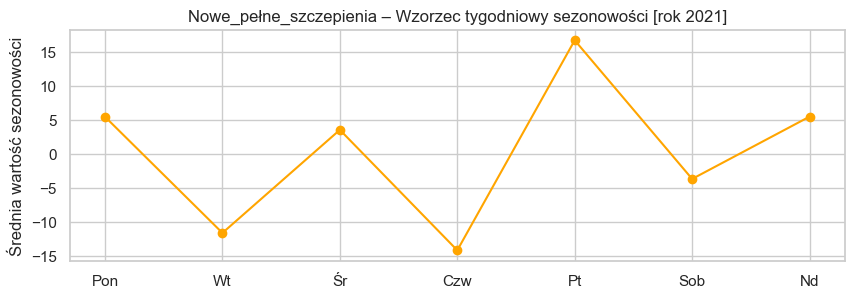

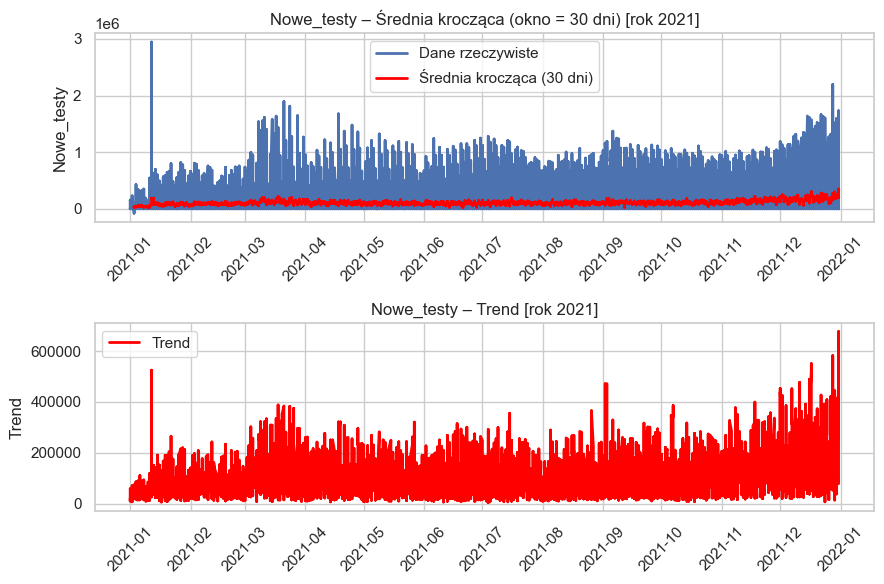

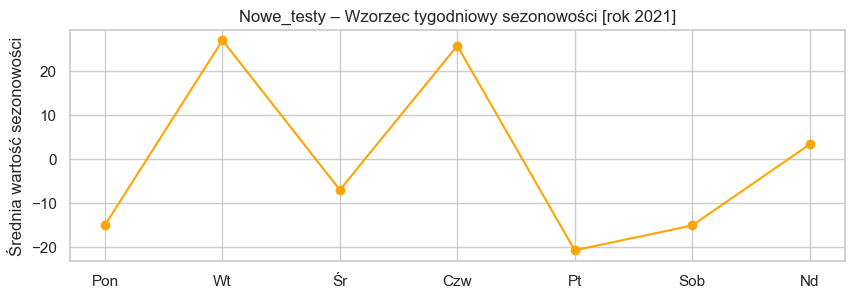

In [13]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# --- Przygotowanie danych ---
df_europe_ex2 = df_europe_ex1.copy()
df_europe_ex2.set_index('date', inplace=True)
df_europe_ex2.index = pd.to_datetime(df_europe_ex2.index)
y_full = df_europe_ex2['Total_confirmed_cases'].dropna()

# Wybieramy dane tylko z roku 2021
y = y_full[(y_full.index >= '2021-01-01') & (y_full.index <= '2021-12-31')]

# --- Parametry ---
period = 7   # Okres sezonowości (np. tygodniowa sezonowość)
window = 30  # Okno dla średniej ruchomej (30 dni)

# --- Dekompozycja ---
decomposition = sm.tsa.seasonal_decompose(y, model='additive', period=period)

# --- Wykresy dla każdej zmiennej ---
for label, col in columns.items():
    y_full = df_europe_ex2[col].dropna()
    y = y_full[(y_full.index >= '2021-01-01') & (y_full.index <= '2021-12-31')]

    decomposition = sm.tsa.seasonal_decompose(y, model='additive', period=period)

    fig, axes = plt.subplots(2, 1, figsize=(9, 6))

    # Wykres 1: Dane + średnia krocząca
    rolling_mean = y.rolling(window=window).mean()
    axes[0].plot(y.index, y.values, label='Dane rzeczywiste', linewidth=2)
    axes[0].plot(rolling_mean.index, rolling_mean.values, label=f'Średnia krocząca ({window} dni)', color='red', linewidth=2)
    axes[0].set_title(f'{label} – Średnia krocząca (okno = {window} dni) [rok 2021]')
    axes[0].set_ylabel(label)
    axes[0].legend()
    axes[0].grid(True)

    # Wykres 2: Trend
    axes[1].plot(decomposition.trend.index, decomposition.trend.values, label='Trend', color='red', linewidth=2)
    axes[1].set_title(f'{label} – Trend [rok 2021]')
    axes[1].set_ylabel('Trend')
    axes[1].legend()
    axes[1].grid(True)

    # Formatowanie dat
    for ax in axes:
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Wzorzec tygodniowy sezonowości
    seasonality = decomposition.seasonal
    dow = seasonality.index.dayofweek
    weekly_pattern = seasonality.groupby(dow).mean()

    plt.figure(figsize=(10, 3))
    plt.plot(['Pon', 'Wt', 'Śr', 'Czw', 'Pt', 'Sob', 'Nd'], weekly_pattern.values,
             marker='o', linestyle='-', color='orange')
    plt.title(f'{label} – Wzorzec tygodniowy sezonowości [rok 2021]')
    plt.ylabel('Średnia wartość sezonowości')
    plt.grid(True)
    plt.show()

- Nowe zachorowania - znaczący wzrost zachorowań pod koniec roku, wcześniej stabilnie.
- Nowe zgony - trzy duże fale zgonów i znaczny spadek w okresie letnim.
- Nowe szczepienia - największa fala od kwienia do sierpnia, ale bez dużych, nagłych spadków/wzrostów.
- Nowe pełne szczepienia - podobne do szczepień, ale wzrosty były bardziej intensywne.
- Nowe testy - najmniejsze zróżnicowe, praktywnie brak nagłych fal bądź spadków.

# Część 3: Analiza regresji 

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_europe_ex3 = df_europe[['date', 'Country_name'] + list(columns.values())].copy()

df_europe_ex3 = df_europe_ex3[df_europe_ex3['Country_name'] == 'Norway']


=== Regresja Liniowa - Nowe Zachorowania ===
R2 (test): -0.4590
MSE (test): 65638358.91



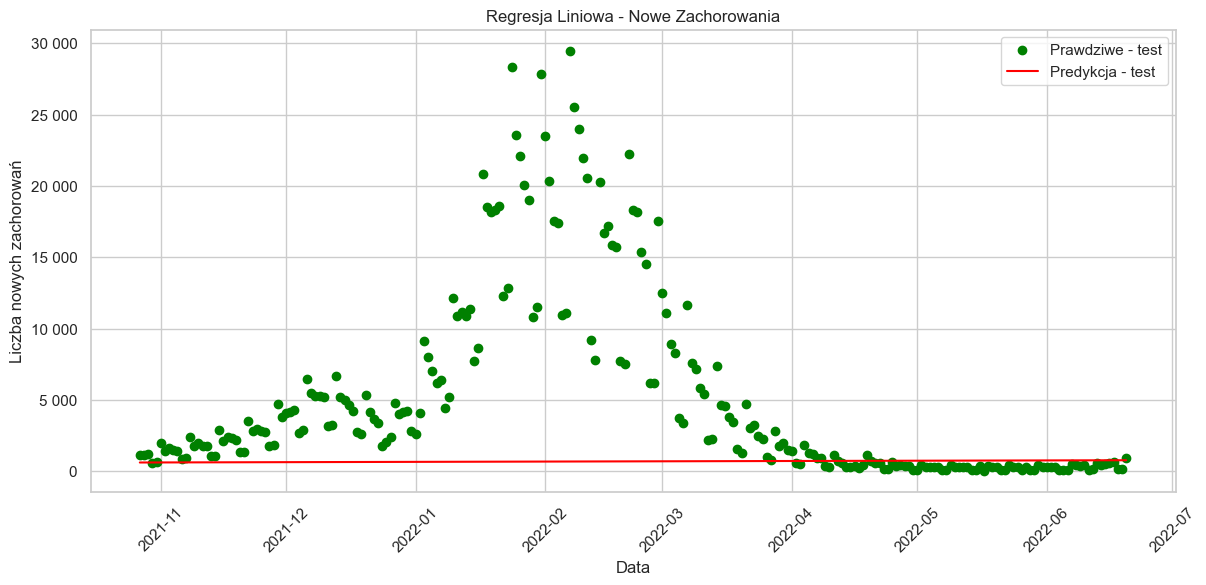

=== Regresja Liniowa - Nowe Zgony ===
R2 (test): -0.1398
MSE (test): 916.02



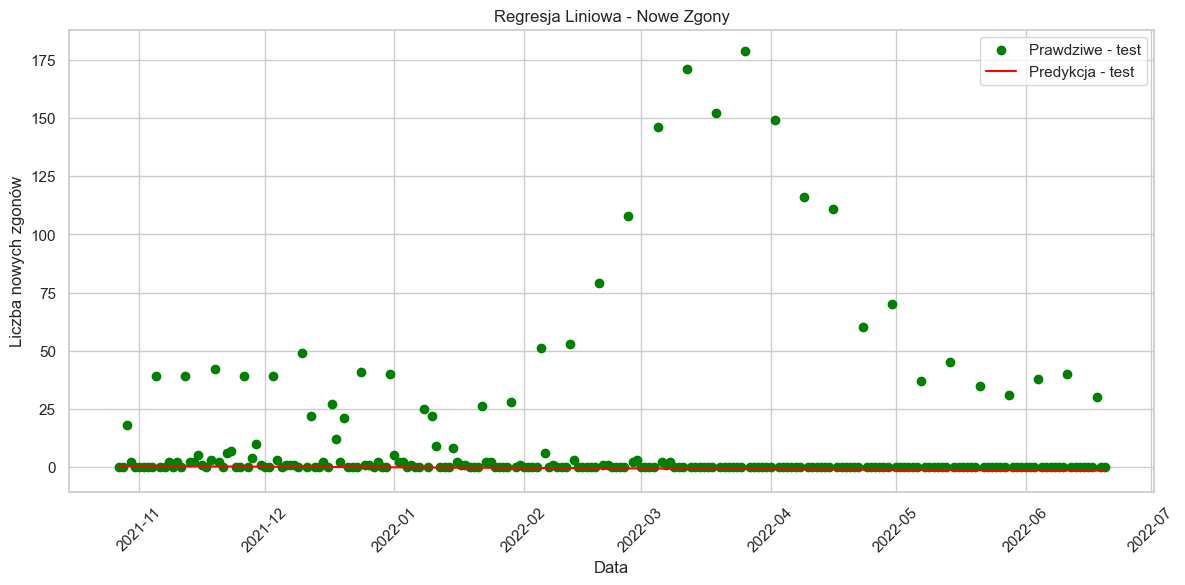

=== Regresja Liniowa - Nowe Szczepienia ===
R2 (test): -602.0403
MSE (test): 361402902.76



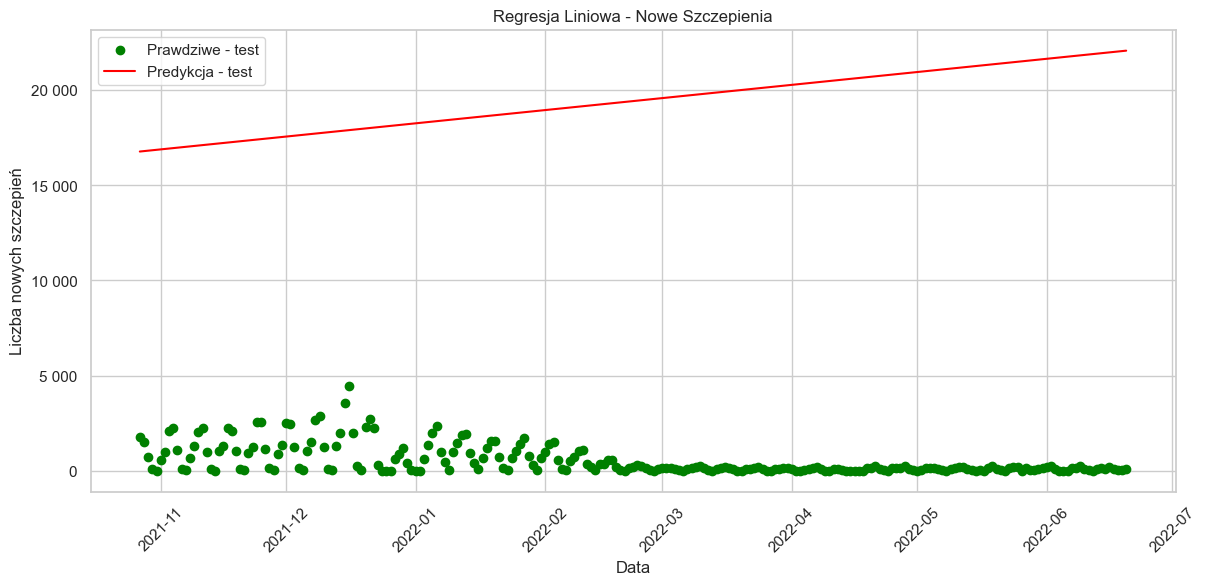

=== Regresja Liniowa - Nowe Pełne Szczepienia ===
R2 (test): -254.3680
MSE (test): 922277201.29



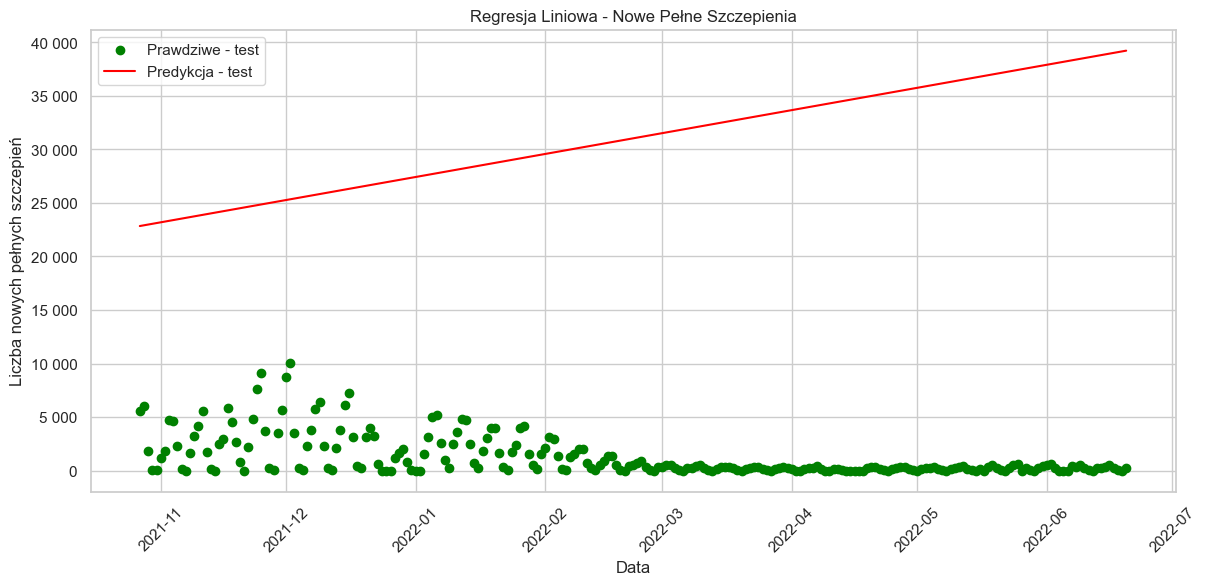

=== Regresja Liniowa - Nowe Testy ===
R2 (test): 0.1159
MSE (test): 131140702.58



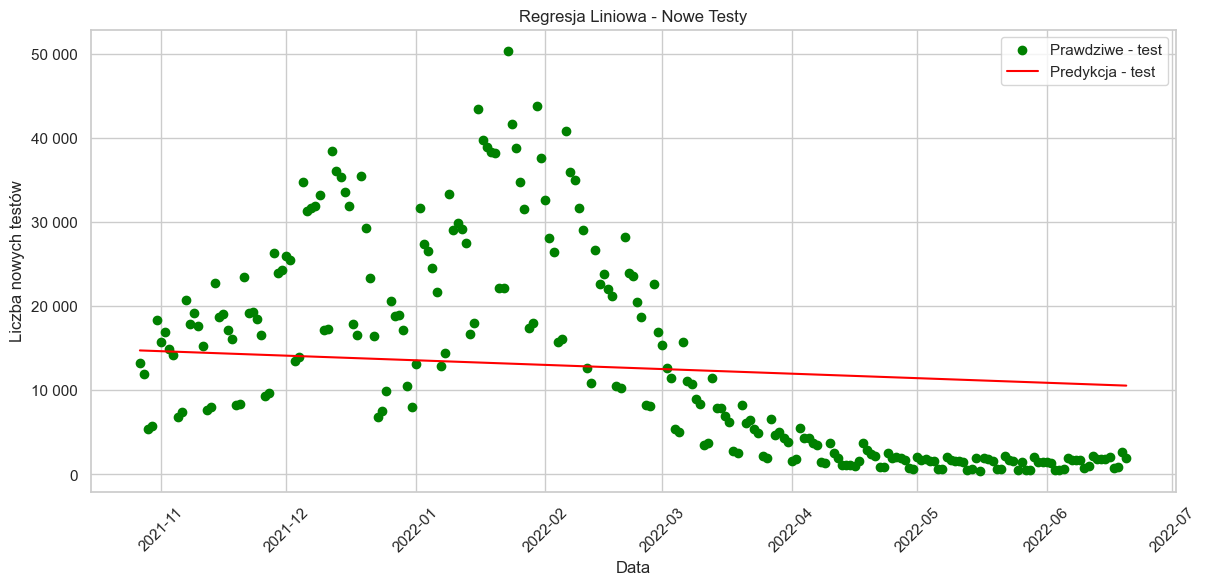

In [15]:
# Jest to po 46 tygodni
train_start = pd.to_datetime('2020-12-08')
train_end = pd.to_datetime('2021-10-26')
test_start = pd.to_datetime('2021-10-27')
test_end = pd.to_datetime('2022-09-14') 



df_train = df_europe_ex3[(df_europe_ex3['date'] >= train_start) & (df_europe_ex3['date'] <= train_end)].copy()
df_test = df_europe_ex3[(df_europe_ex3['date'] >= test_start) & (df_europe_ex3['date'] <= test_end)].copy()

df_train['New_persons_fully_vaccinated'] = df_train['New_persons_fully_vaccinated'].fillna(0)
df_test['New_persons_fully_vaccinated'] = df_test['New_persons_fully_vaccinated'].fillna(0)

def prepare_X(df):
    return (df['date'] - train_start).dt.days.values.reshape(-1, 1)

X_train = prepare_X(df_train)
X_test = prepare_X(df_test)


def run_regression(y_train, y_test, title, y_label):
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(f'=== {title} ===')
    print(f'R2 (test): {r2_score(y_test, y_pred_test):.4f}')
    print(f'MSE (test): {mean_squared_error(y_test, y_pred_test):.2f}')
    print()

    plt.figure(figsize=(14,6))
    #plt.plot(df_train['date'], y_train, label='Prawdziwe - trening', color='blue')
    plt.scatter(df_test['date'], y_test, label='Prawdziwe - test', color='green')
    #plt.plot(df_train['date'], y_pred_train, label='Predykcja - trening', linestyle='--', color='red')
    plt.plot(df_test['date'], y_pred_test, label='Predykcja - test', color='red')
    plt.title(title)
    plt.xlabel('Data')
    plt.ylabel(y_label)
    plt.ticklabel_format(style='plain', axis='y')
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'.replace(',', ' ')))
    ax.tick_params(axis='x', rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()


run_regression(
    y_train = df_train['Total_confirmed_cases'],
    y_test = df_test['Total_confirmed_cases'],
    title = 'Regresja Liniowa - Nowe Zachorowania',
    y_label = 'Liczba nowych zachorowań'
)

run_regression(
    y_train = df_train['Total_new_deceased'],
    y_test = df_test['Total_new_deceased'],
    title = 'Regresja Liniowa - Nowe Zgony',
    y_label = 'Liczba nowych zgonów'
)

run_regression(
    y_train = df_train['Total_new_vaccinations'],
    y_test = df_test['Total_new_vaccinations'],
    title = 'Regresja Liniowa - Nowe Szczepienia',
    y_label = 'Liczba nowych szczepień'
)


run_regression(
    y_train = df_train['New_persons_fully_vaccinated'],
    y_test = df_test['New_persons_fully_vaccinated'],
    title = 'Regresja Liniowa - Nowe Pełne Szczepienia',
    y_label = 'Liczba nowych pełnych szczepień'
)

run_regression(
    y_train = df_train['Total_tested'],
    y_test = df_test['Total_tested'],
    title = 'Regresja Liniowa - Nowe Testy',
    y_label = 'Liczba nowych testów'
)


Wnioski:
Tworzenie regresji liniowej dla danych COVID-19 nie ma sensu, ponieważ pandemia rozwijała się w sposób nieliniowy, a zmienne zewnętrzne, takie jak zmiany w polityce zdrowotnej czy dostępność szczepionek, miały duży wpływ na dane. Ponadto, modele regresji nie uwzględniają opóźnień czasowych oraz dynamicznych zmian w czasie, co utrudnia trafne prognozy.

# Część 4 Regresja wielomianowa

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
df_Norway = df_europe[df_europe[('Country_name')] == 'Norway'].copy()
df_Norway['days'] = (df_Norway['date'] - df_Norway['date'].min()).dt.days
kolumny = {
    'Nowe zachorowania': 'Total_confirmed_cases',
    'Nowe zgony': 'Total_new_deceased',
    'Nowe szczepienia': 'Total_new_vaccinations',
    'Nowe pełne szczepienia': 'New_persons_fully_vaccinated',
    'Nowe testy': 'Total_tested'
}

Do porównywania stopniu wielomianów oraz regresji liniowej korzystamy z:
 - współczynnika determinacji R^2, który  jaka część całkowitej zmienności wartości rzeczywistych jest wyjaśniona przez model <br>
(1 = idealne dopasowanie, 0 = model nic nie wyjaśnia, -1 = model jest gorszy niż losowanie).

- MSE - błąd średniokwadratowy - średnia z kwadratów różnic między wartościami rzeczywistymi a przewidywanymi przez model.

In [17]:
def analyze_polynomial_regression(df, feature_col, name, max_degree=15):
    X = df[['days']].values
    y = df[feature_col].fillna(0).values

    results = []

    for degree in range(1, max_degree + 1):
        poly = PolynomialFeatures(degree)
        X_poly = poly.fit_transform(X)

        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)

        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        results.append((degree, r2, mse, y_pred))

    best = max(results, key=lambda x: x[1])  # najlepsze R²
    best_degree, best_r2, best_mse, best_pred = best

    # model liniowy dla porównania
    model_lin = LinearRegression()
    model_lin.fit(X, y)
    y_lin_pred = model_lin.predict(X)
    lin_r2 = r2_score(y, y_lin_pred)
    lin_mse = mean_squared_error(y, y_lin_pred)


    # wykres
    plt.figure(figsize=(10, 5))
    plt.plot(df['date'], y, label='Rzeczywiste dane', color='black')
    plt.plot(df['date'], best_pred, label=f'Regresja wielomianowa (stopień {best_degree})', color='blue')
    plt.plot(df['date'], y_lin_pred, label='Regresja liniowa', color='red')
    plt.title(f'{name} - analiza regresji')
    plt.xlabel('Data')
    plt.ylabel(name)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"{name} — najbardziej dopasowany jest wielomian stopnia {best_degree}")
    print("\nModel wielomianowy vs liniowy:\n")
    print(f" R² dla modelu liniowego: {lin_r2:.2f}")
    print(f" R² dla modelu wielomianowego: {best_r2:.2f}\n")
    print(f" MSE modelu wielomianowego: {best_mse:.2f}")
    print(f" MSE modelu liniowego: {lin_mse:.2f}\n")

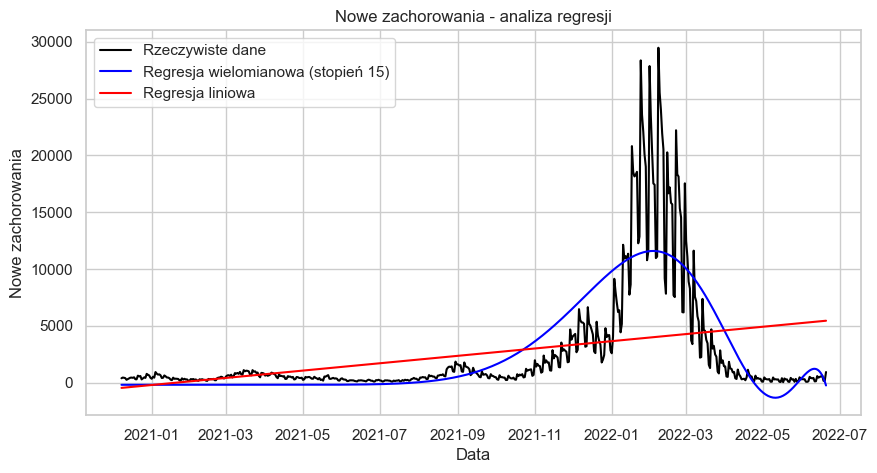

Nowe zachorowania — najbardziej dopasowany jest wielomian stopnia 15

Model wielomianowy vs liniowy:

 R² dla modelu liniowego: 0.12
 R² dla modelu wielomianowego: 0.64

 MSE modelu wielomianowego: 8800125.15
 MSE modelu liniowego: 21740357.76



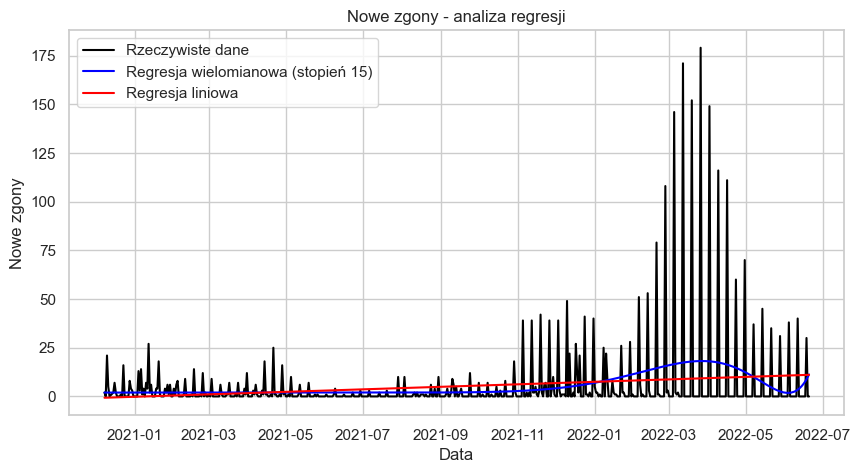

Nowe zgony — najbardziej dopasowany jest wielomian stopnia 15

Model wielomianowy vs liniowy:

 R² dla modelu liniowego: 0.03
 R² dla modelu wielomianowego: 0.07

 MSE modelu wielomianowego: 340.30
 MSE modelu liniowego: 355.53



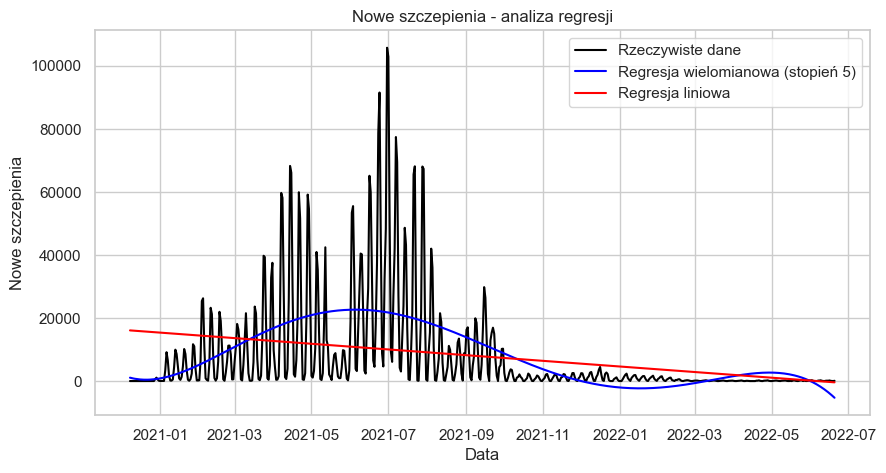

Nowe szczepienia — najbardziej dopasowany jest wielomian stopnia 5

Model wielomianowy vs liniowy:

 R² dla modelu liniowego: 0.09
 R² dla modelu wielomianowego: 0.31

 MSE modelu wielomianowego: 171319327.99
 MSE modelu liniowego: 225321100.51



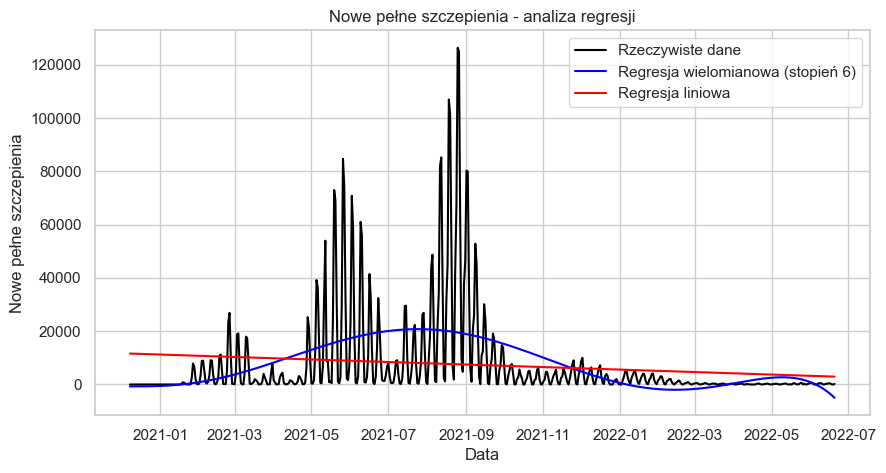

Nowe pełne szczepienia — najbardziej dopasowany jest wielomian stopnia 6

Model wielomianowy vs liniowy:

 R² dla modelu liniowego: 0.02
 R² dla modelu wielomianowego: 0.23

 MSE modelu wielomianowego: 218315472.62
 MSE modelu liniowego: 275786670.59



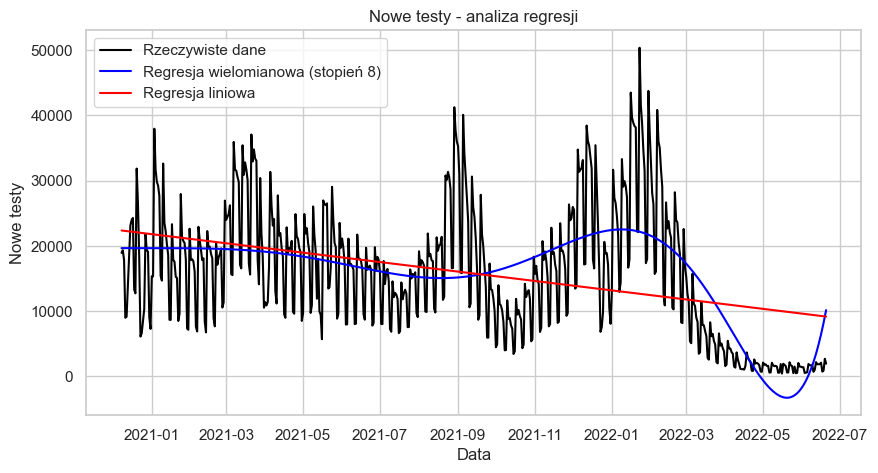

Nowe testy — najbardziej dopasowany jest wielomian stopnia 8

Model wielomianowy vs liniowy:

 R² dla modelu liniowego: 0.14
 R² dla modelu wielomianowego: 0.42

 MSE modelu wielomianowego: 60720899.44
 MSE modelu liniowego: 89434733.57



In [18]:
for name, feature_col in kolumny.items():
    analyze_polynomial_regression(df_Norway, feature_col, name)

- R² w każdym przypadku jest większe dla modelu wielomianowego niż liniowego.
- MSE w każdym przypadku jest większe dla modelu liniowego niż wielomianowego.
- Oznacza to, że w każdym przypadku regresja wielomianowa jest lepszym rozwiązaniem.
- Najlepiej dopasowane do regresji wielomianowej są nowe zachorowania (R²=0,64), nowe testy mają także niezły wynik (R²=0,42).
- Szczepienia i pełne szczepienia są gorzej dopasowane, ale mimo wszystko regresja wielomianowa pokazuje główny trend (R²=0,31 i R²=0,23).
- Nowe śmierci mają znikome dopasowanie nawet dla regresji wielomianowej (R²=0,07), ale nawet w takim słabym przypadku poradziła ona sobie lepiej od regresji liniowej.

# Część 5

=== Regresja Liniowa - Nowe Zachorowania ===
Włochy - R2 (test): -4.3562
Włochy - MSE (test): 79622773.43
Brazylia - R2 (test): -4.6626
Brazylia - MSE (test): 2514489693.05



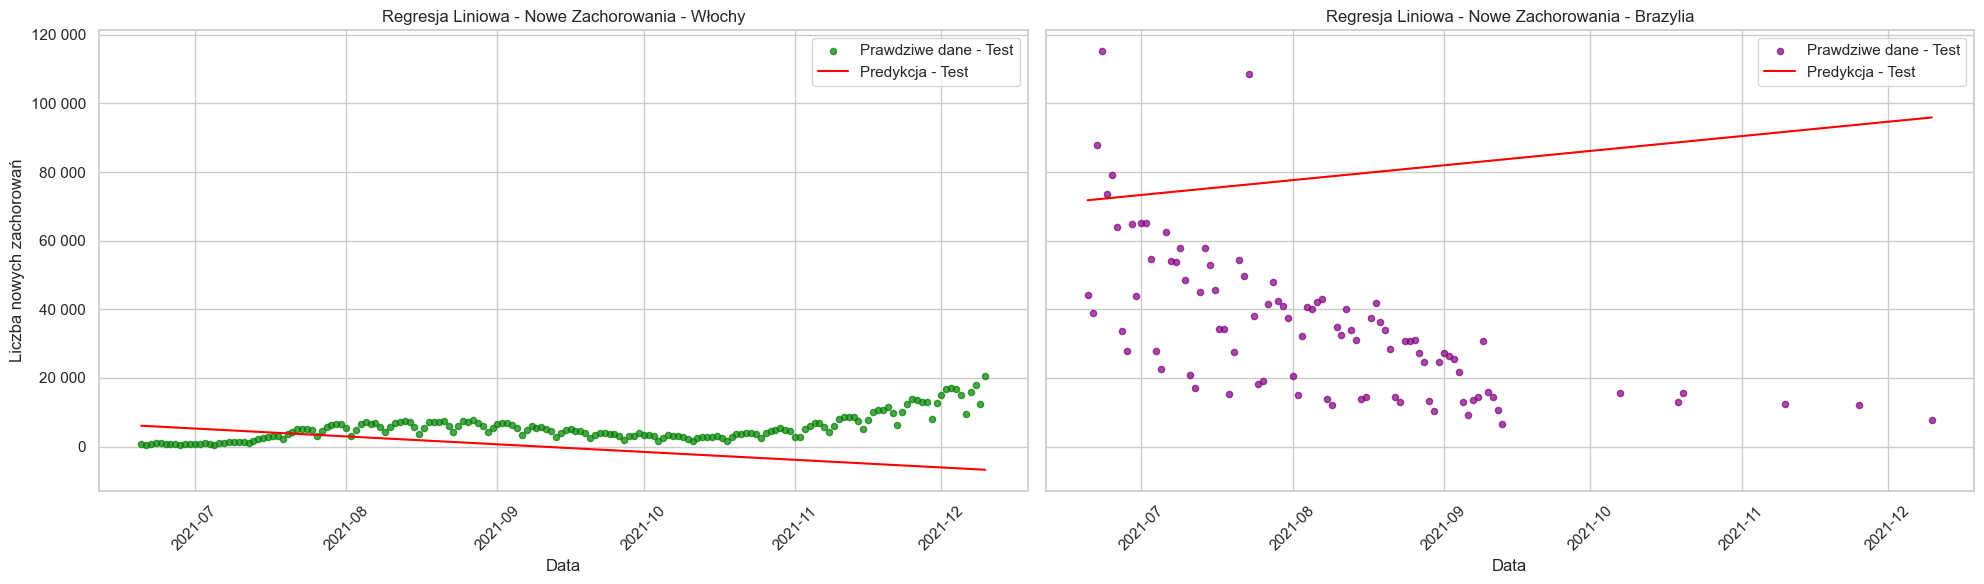

=== Regresja Liniowa - Nowe Zgony ===
Włochy - R2 (test): -60.5159
Włochy - MSE (test): 31671.86
Brazylia - R2 (test): -16.0908
Brazylia - MSE (test): 4833526.14



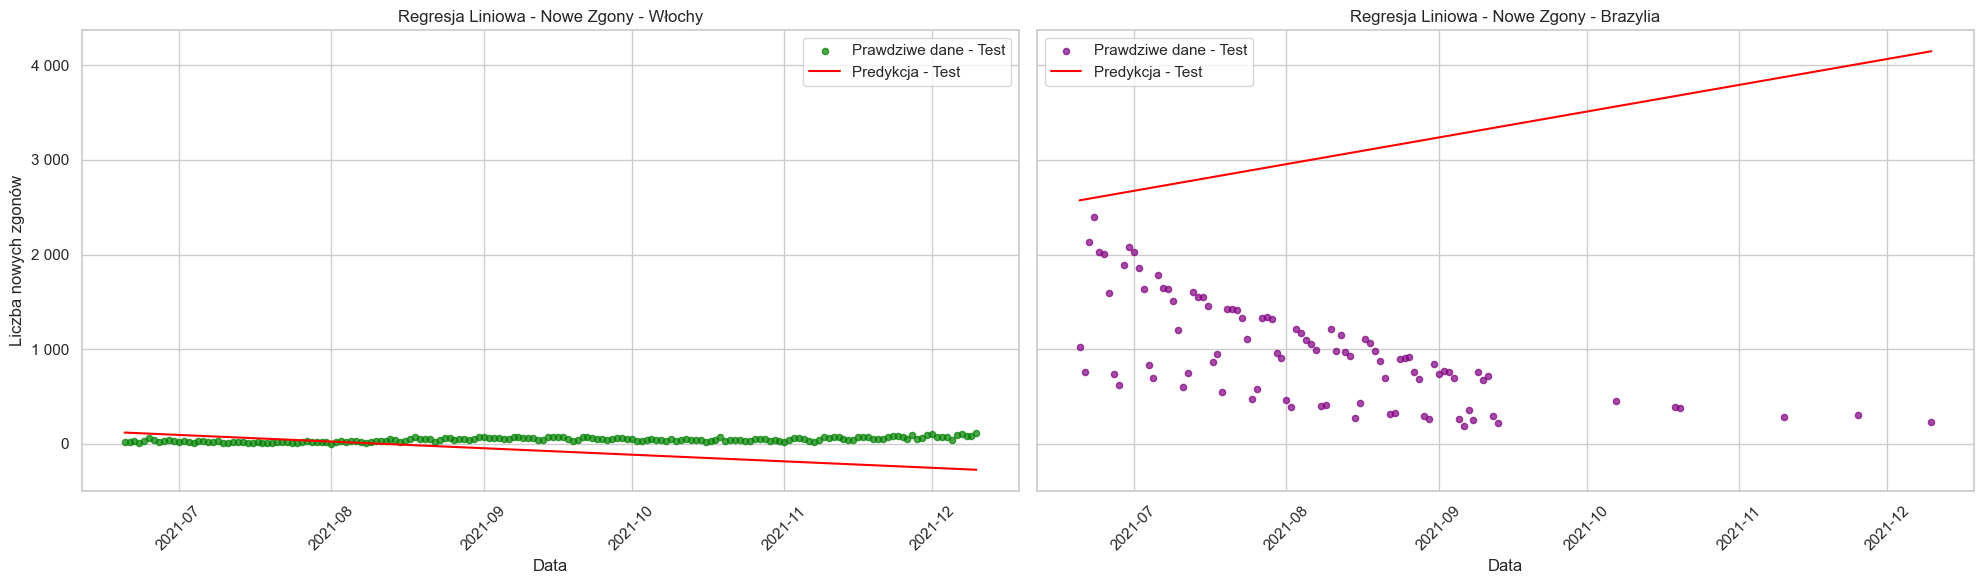

=== Regresja Liniowa - Nowe Szczepienia ===
Włochy - R2 (test): -63.2549
Włochy - MSE (test): 283969020639.74
Brazylia - R2 (test): -0.6977
Brazylia - MSE (test): 280254283366.41



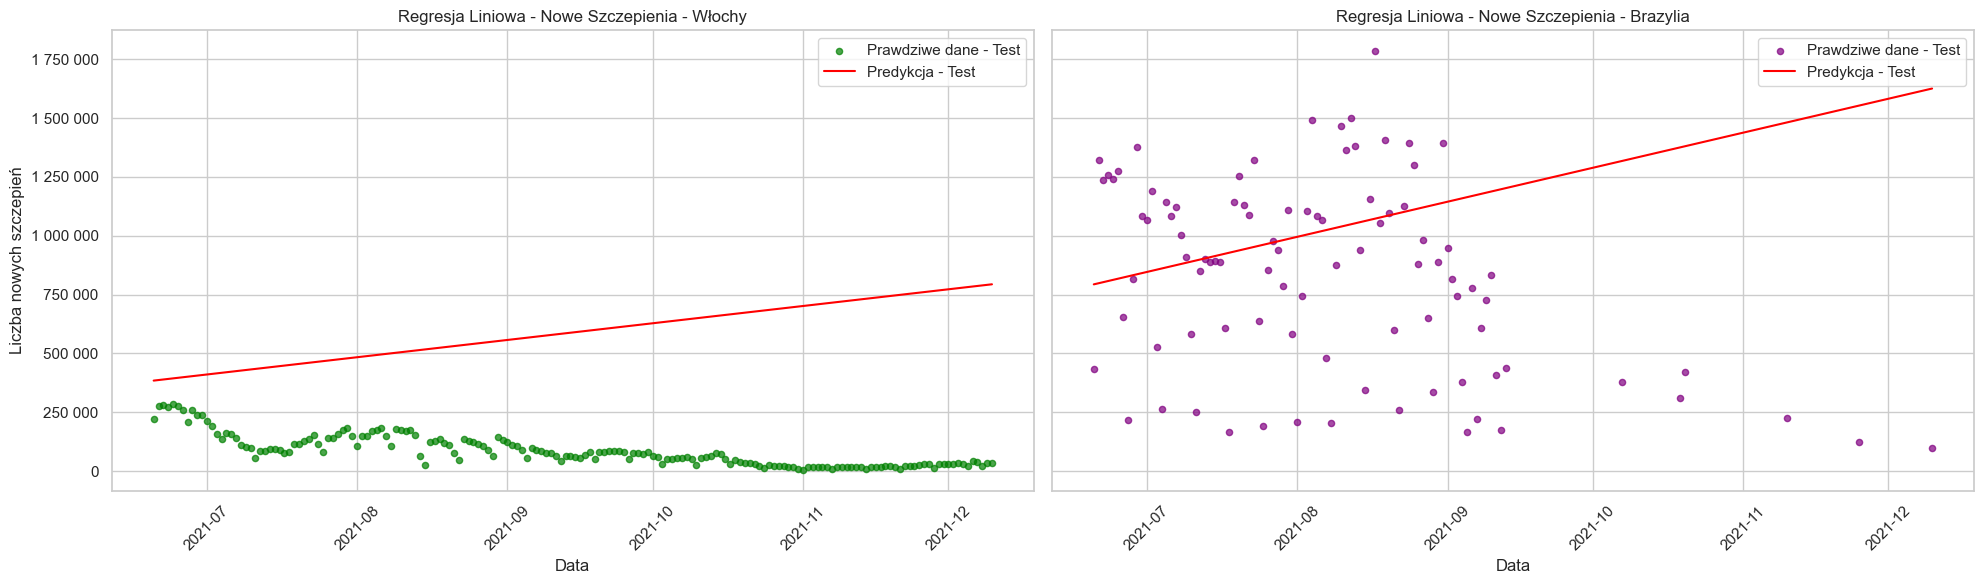

=== Regresja Liniowa - Nowe Pełne Szczepienia ===
Włochy - R2 (test): -1.7209
Włochy - MSE (test): 53088413913.07
Brazylia - R2 (test): -0.1541
Brazylia - MSE (test): 167945846163.57



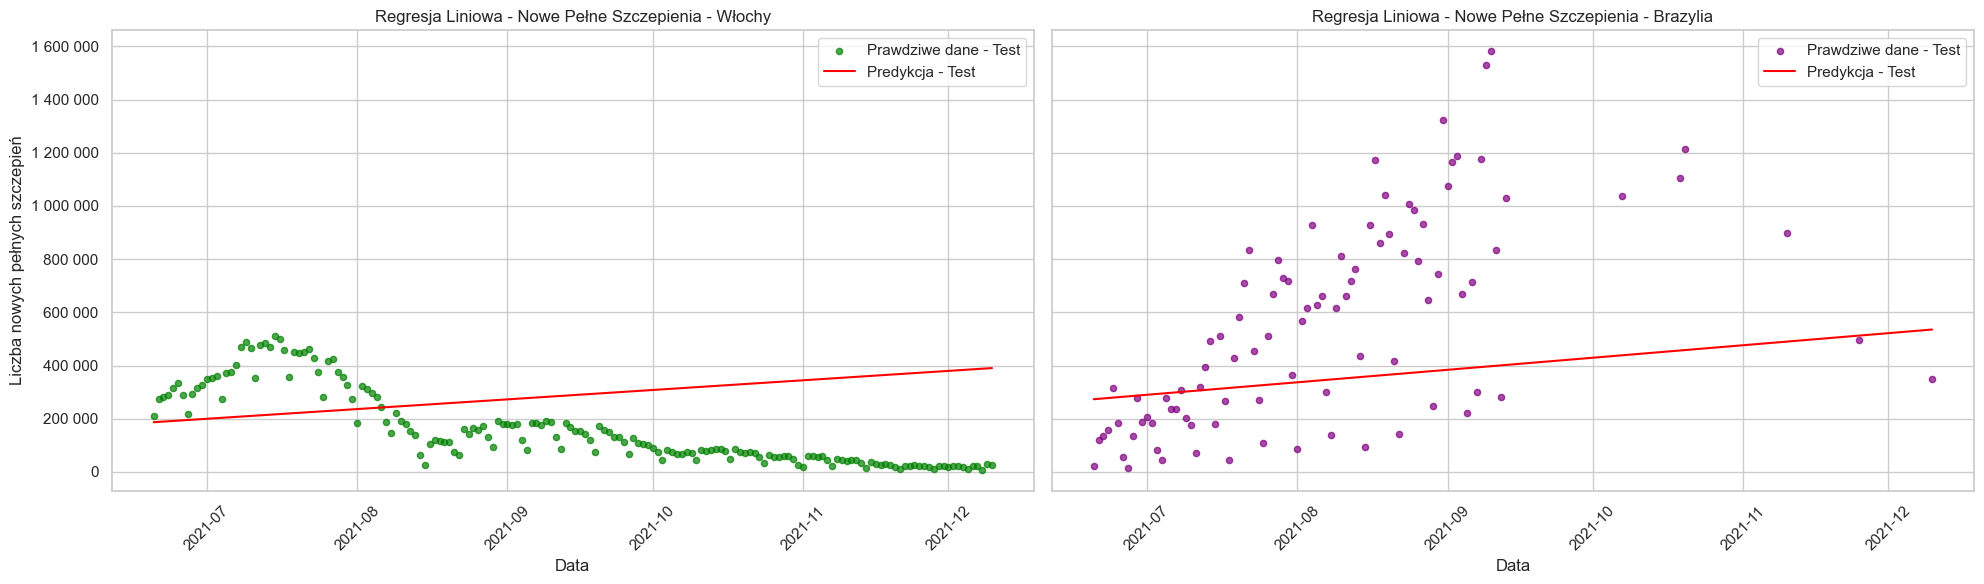

=== Regresja Liniowa - Nowe Testy ===
Włochy - R2 (test): 0.0255
Włochy - MSE (test): 26254908862.18
Brazylia - R2 (test): -14.2320
Brazylia - MSE (test): 13649350706.66



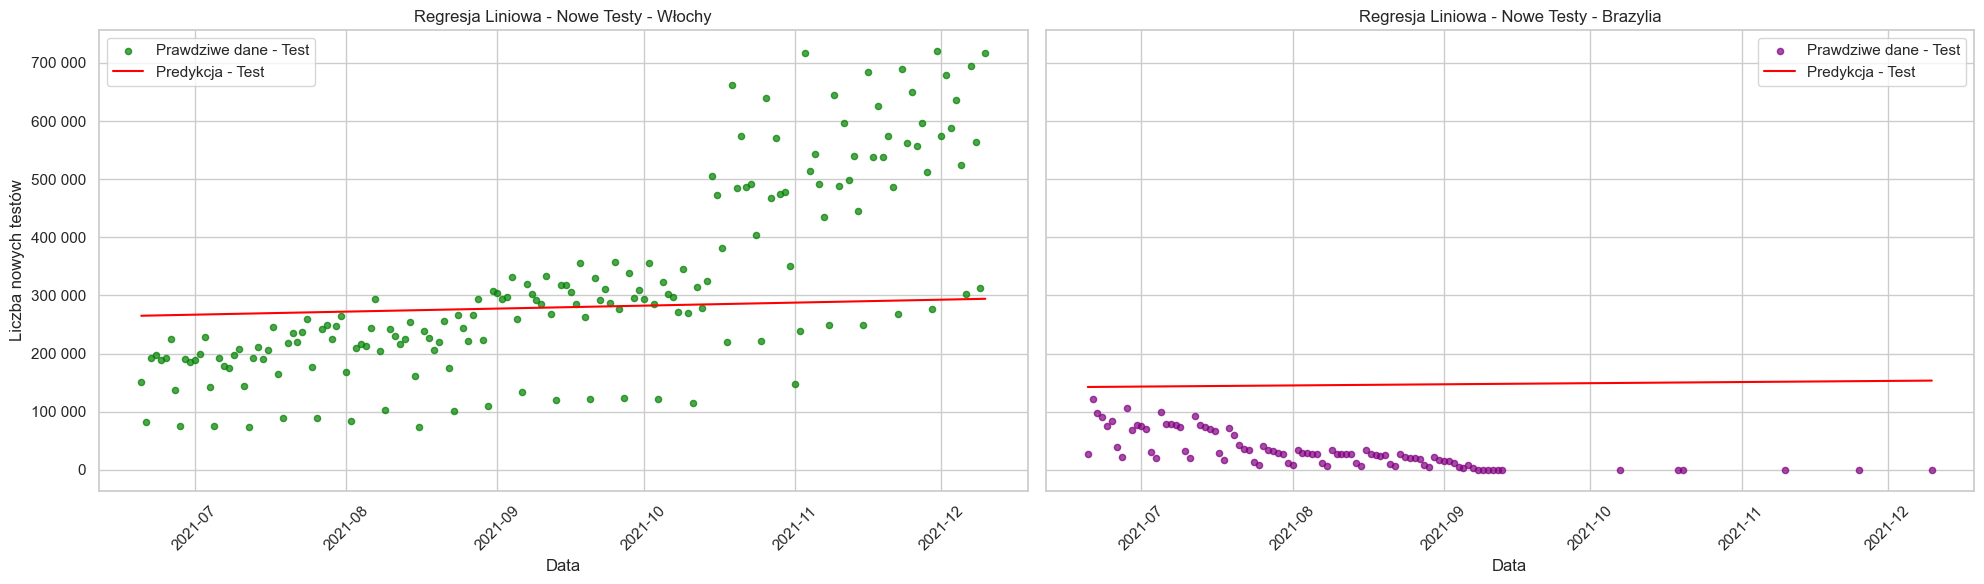

In [19]:
# Przygotowanie danych
train_start = pd.to_datetime('2020-12-27')
train_end = pd.to_datetime('2021-06-19')
test_start = pd.to_datetime('2021-06-20')
test_end = pd.to_datetime('2021-12-10')

df_italy = df_data[df_data['Country_name'] == 'Italy'].copy()
df_brazil = df_data[df_data['Country_name'] == 'Brazil'].copy()

df_italy_train = df_italy[(df_italy['date'] >= train_start) & (df_italy['date'] <= train_end)].copy()
df_italy_test = df_italy[(df_italy['date'] >= test_start) & (df_italy['date'] <= test_end)].copy()

df_brazil_train = df_brazil[(df_brazil['date'] >= train_start) & (df_brazil['date'] <= train_end)].copy()
df_brazil_test = df_brazil[(df_brazil['date'] >= test_start) & (df_brazil['date'] <= test_end)].copy()



columns_to_fill = [
    'Total_confirmed_cases', 
    'Total_new_deceased', 
    'Total_new_vaccinations', 
    'New_persons_fully_vaccinated', 
    'Total_tested'
]

# W brazyli Total_new_vaccinations 22 ma nan

# print("Brakujące wartości w danych przed ich uzupełnieniem:")
# print("Brazylia:")
# print(df_brazil[columns_to_fill].isnull().sum())  # Wyświetlenie brakujących wartości w Brazylia
# print("\nWłochy:")
# print(df_italy[columns_to_fill].isnull().sum())  # Wyświetlenie brakujących wartości w Włochy
# print("\n")

for col in columns_to_fill:
    for df in [df_italy_train, df_italy_test, df_brazil_train, df_brazil_test]:
        df[col] = df[col].fillna(0)

def prepare_X(df, ref_date):
    return (df['date'] - ref_date).dt.days.values.reshape(-1, 1)

X_italy_train = prepare_X(df_italy_train, train_start)
X_italy_test = prepare_X(df_italy_test, train_start)

X_brazil_train = prepare_X(df_brazil_train, train_start)
X_brazil_test = prepare_X(df_brazil_test, train_start)

def run_regression(y_italy_train, y_italy_test, y_brazil_train, y_brazil_test, title, y_label):
    model = LinearRegression()

    model.fit(X_italy_train, y_italy_train)
    y_pred_italy_test = model.predict(X_italy_test)

    model.fit(X_brazil_train, y_brazil_train)
    y_pred_brazil_test = model.predict(X_brazil_test)

    print(f'=== {title} ===')
    print(f'Włochy - R2 (test): {r2_score(y_italy_test, y_pred_italy_test):.4f}')
    print(f'Włochy - MSE (test): {mean_squared_error(y_italy_test, y_pred_italy_test):.2f}')
    print(f'Brazylia - R2 (test): {r2_score(y_brazil_test, y_pred_brazil_test):.4f}')
    print(f'Brazylia - MSE (test): {mean_squared_error(y_brazil_test, y_pred_brazil_test):.2f}')
    print()

    fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

    # Włochy
    axs[0].scatter(df_italy_test['date'], y_italy_test, label='Prawdziwe dane - Test', color='green', s=20, alpha=0.7)
    axs[0].plot(df_italy_test['date'], y_pred_italy_test, label='Predykcja - Test', color='red')
    axs[0].set_title(f'{title} - Włochy')
    axs[0].set_xlabel('Data')
    axs[0].set_ylabel(y_label)
    axs[0].legend()
    axs[0].grid(True)
    axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'.replace(',', ' ')))
    axs[0].tick_params(axis='x', rotation=45)

    # Brazylia
    axs[1].scatter(df_brazil_test['date'], y_brazil_test, label='Prawdziwe dane - Test', color='purple', s=20, alpha=0.7)
    axs[1].plot(df_brazil_test['date'], y_pred_brazil_test, label='Predykcja - Test', color='red')
    axs[1].set_title(f'{title} - Brazylia')
    axs[1].set_xlabel('Data')
    axs[1].legend()
    axs[1].grid(True)
    axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axs[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Wywołanie
run_regression(
    y_italy_train = df_italy_train['Total_confirmed_cases'],
    y_italy_test = df_italy_test['Total_confirmed_cases'],
    y_brazil_train = df_brazil_train['Total_confirmed_cases'],
    y_brazil_test = df_brazil_test['Total_confirmed_cases'],
    title = 'Regresja Liniowa - Nowe Zachorowania',
    y_label = 'Liczba nowych zachorowań'
)

run_regression(
    y_italy_train = df_italy_train['Total_new_deceased'],
    y_italy_test = df_italy_test['Total_new_deceased'],
    y_brazil_train = df_brazil_train['Total_new_deceased'],
    y_brazil_test = df_brazil_test['Total_new_deceased'],
    title = 'Regresja Liniowa - Nowe Zgony',
    y_label = 'Liczba nowych zgonów'
)

run_regression(
    y_italy_train = df_italy_train['Total_new_vaccinations'],
    y_italy_test = df_italy_test['Total_new_vaccinations'],
    y_brazil_train = df_brazil_train['Total_new_vaccinations'],
    y_brazil_test = df_brazil_test['Total_new_vaccinations'],
    title = 'Regresja Liniowa - Nowe Szczepienia',
    y_label = 'Liczba nowych szczepień'
)

run_regression(
    y_italy_train = df_italy_train['New_persons_fully_vaccinated'],
    y_italy_test = df_italy_test['New_persons_fully_vaccinated'],
    y_brazil_train = df_brazil_train['New_persons_fully_vaccinated'],
    y_brazil_test = df_brazil_test['New_persons_fully_vaccinated'],
    title = 'Regresja Liniowa - Nowe Pełne Szczepienia',
    y_label = 'Liczba nowych pełnych szczepień'
)

run_regression(
    y_italy_train = df_italy_train['Total_tested'],
    y_italy_test = df_italy_test['Total_tested'],
    y_brazil_train = df_brazil_train['Total_tested'],
    y_brazil_test = df_brazil_test['Total_tested'],
    title = 'Regresja Liniowa - Nowe Testy',
    y_label = 'Liczba nowych testów'
)

In [20]:
display(df_brazil[['gdp_per_capita_usd', 'Density (per km²)', 'population_urban']].head(1))
display(df_italy[['gdp_per_capita_usd', 'Density (per km²)', 'population_urban']].head(1))


,gdp_per_capita_usd,Density (per km²),population_urban
4943,8717.0,25.2841,183241641.0


,gdp_per_capita_usd,Density (per km²),population_urban
8703,34456.0,195.9191,42651966.0


Wybraliśmy te kraje, ponieważ są one położone na 2 różnych kontynetach oraz mają duże różnice w powyższych danych.

Wnioski:
1. Nowe zachorowania:
    1. Zauważamy bardzo dużą rozbierzność w predykcjach regresji liniowej dla tych państw. Widać, że Brazylia nie radziła sobie z rozprzestrzeniajacym się wirusem.
2. Nowe zgodny:
    1. Również tutaj widać ogromną różnicę między predykcjami zgonów. Zauważamy, że brazylia bardzo mocno odczuła skutki COVID19. Powodem jest o wiele gorsza służba zdrowia oraz 
3. Nowe szczepienia:
    1. Zaskakująca jest duża liczba szczepień w Brazyli ale istnieje powód tego zachowania, gdyż Włochy rozpoczęły oficjalną kampanię szczepień 27 grudnia 2020 roku, a Brazylia rozpoczęła krajową kampanię szczepień 17 stycznia 2021 roku. Co może przekładać się na to, że liczba szczepień we Włoszechr rosła ale nie aż tak gwałtownie jak w Brazyli.
4. Pełne szczepienia:
    1. Zauważamy, że predykcje dla całkowicie zaszczepionych są podobne.
5. Nowe test:
    1. Widzimy, że we Włoszech jak i w Brazyli liczba testowanych osób jest mniej więcej stała.
    2. Włochy, ponieważ mają lepszą opiekę zdrowotną mogą wykonywać tych testów więcej niż Brazylia.